In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Set plot style
sns.set_style('whitegrid')

# Load the dataset
# Make sure 'all_car_data.csv' is in the same folder as your notebook.
df = pd.read_csv('all_car_data.csv')

df.head()

,Brand,Car Name,Price,Rating,Safety,Mileage,Power (BHP)
0,Maruti Suzuki,Maruti Brezza,Rs. 8.69 Lakh,4.5/5,NaN,17-25 kmpl,87-102 bhp
1,Maruti Suzuki,Maruti Fronx,Rs. 7.54 Lakh,4.6/5,NaN,20-28 kmpl,76-99 bhp
2,Maruti Suzuki,Maruti Swift,Rs. 6.49 Lakh,4.6/5,NaN,24-32 kmpl,69-80 bhp
3,Maruti Suzuki,Maruti Dzire,Rs. 6.84 Lakh,4.7/5,5 Star Safety,24-33 kmpl,69-80 bhp
4,Maruti Suzuki,Maruti Baleno,Rs. 6.70 Lakh,4.5/5,4 Star Safety,22-30 kmpl,76-88 bhp


In [5]:
# --- Data Cleaning Functions ---

def clean_price(price_str):
    if isinstance(price_str, str):
        price_str = price_str.replace("Rs. ", "").strip()
        if "Lakh" in price_str:
            return float(price_str.replace(" Lakh", "")) * 100000
        elif "Crore" in price_str:
            return float(price_str.replace(" Crore", "")) * 10000000
    return np.nan # Return numpy's Not a Number for missing values

def clean_mileage(mileage_str):
    if isinstance(mileage_str, str) and "-" in mileage_str:
        parts = mileage_str.replace(" kmpl", "").split("-")
        return (float(parts[0]) + float(parts[1])) / 2
    return np.nan

def clean_power(power_str):
    if isinstance(power_str, str):
        power_str = power_str.replace(" bhp", "").strip()
        if "-" in power_str:
            parts = power_str.split("-")
            return (float(parts[0]) + float(parts[1])) / 2
        return float(power_str)
    return np.nan

# --- Apply Cleaning Functions ---
df['Price_INR'] = df['Price'].apply(clean_price)
df['Mileage_kmpl'] = df['Mileage'].apply(clean_mileage)
df['Power_bhp'] = df['Power (BHP)'].apply(clean_power)

# Drop original and now redundant columns, and remove rows with missing crucial data
df_cleaned = df.drop(columns=['Price', 'Mileage', 'Power (BHP)'])
df_cleaned.dropna(subset=['Price_INR', 'Power_bhp'], inplace=True)

print("Data after cleaning:")
print(df_cleaned.head())
print("\nData Info:")
df_cleaned.info()

Data after cleaning:
           Brand       Car Name Rating         Safety  Price_INR  \
0  Maruti Suzuki  Maruti Brezza  4.5/5            NaN   869000.0   
1  Maruti Suzuki   Maruti Fronx  4.6/5            NaN   754000.0   
2  Maruti Suzuki   Maruti Swift  4.6/5            NaN   649000.0   
3  Maruti Suzuki   Maruti Dzire  4.7/5  5 Star Safety   684000.0   
4  Maruti Suzuki  Maruti Baleno  4.5/5  4 Star Safety   670000.0   

   Mileage_kmpl  Power_bhp  
0          21.0       94.5  
1          24.0       87.5  
2          28.0       74.5  
3          28.5       74.5  
4          26.0       82.0  

Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 199 entries, 0 to 246
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         199 non-null    object 
 1   Car Name      199 non-null    object 
 2   Rating        196 non-null    object 
 3   Safety        91 non-null     object 
 4   Price_INR     199 non-

Generating Pair Plot...


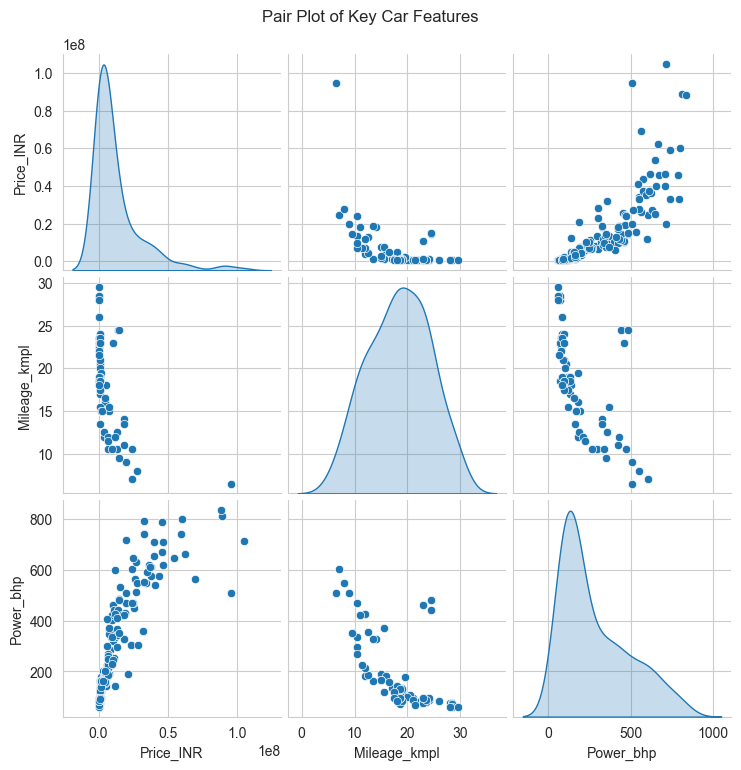


Generating Correlation Heatmap...


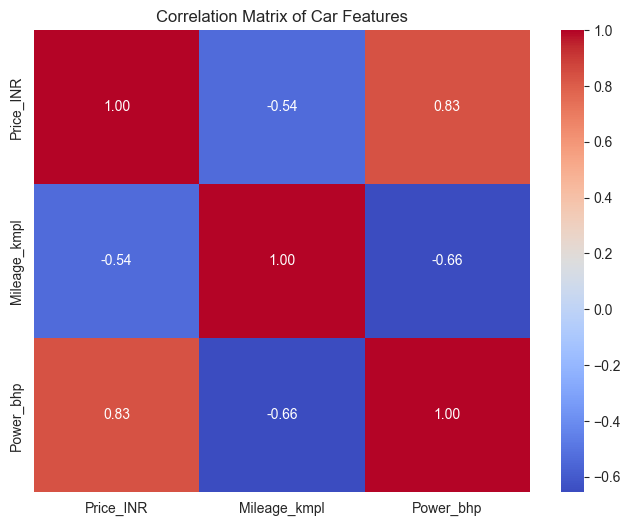

In [6]:
# --- Exploratory Data Analysis (EDA) ---

# 1. Pair Plot to see relationships between variables
print("Generating Pair Plot...")
sns.pairplot(df_cleaned, diag_kind='kde')
plt.suptitle('Pair Plot of Key Car Features', y=1.02)
plt.show()

# 2. Correlation Heatmap
print("\nGenerating Correlation Heatmap...")
plt.figure(figsize=(8, 6))
correlation_matrix = df_cleaned[['Price_INR', 'Mileage_kmpl', 'Power_bhp']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Car Features')
plt.show()

In [7]:
# --- Feature Engineering and Data Splitting ---

# Select features (X) and target (y)
X = df_cleaned[['Power_bhp']]
y = df_cleaned['Price_INR']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 159 samples
Testing set size: 40 samples


In [8]:
# --- Model Training and Evaluation ---

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"--- Model Evaluation Results ---")
print(f"R-squared (R²): {r2:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:,.2f} INR")

--- Model Evaluation Results ---
R-squared (R²): 0.61
Root Mean Squared Error (RMSE): 13,735,372.62 INR


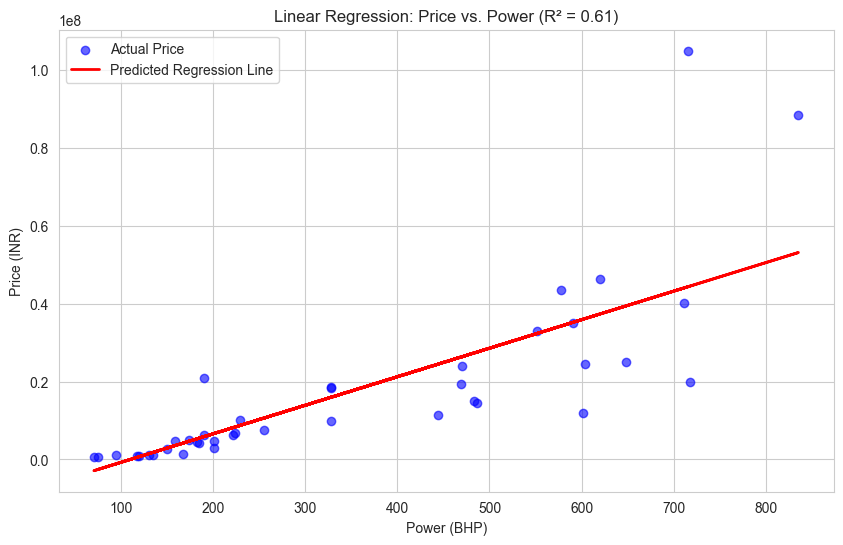

In [9]:
# --- Visualization of Results ---

plt.figure(figsize=(10, 6))

# Scatter plot of the actual data points from the test set
plt.scatter(X_test, y_test, color='blue', label='Actual Price', alpha=0.6)

# Line plot of the model's predictions
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Regression Line')

plt.title(f'Linear Regression: Price vs. Power (R² = {r2:.2f})')
plt.xlabel('Power (BHP)')
plt.ylabel('Price (INR)')
plt.legend()
plt.show()